# Happiness report

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

1. Définir la problématique

2. Définir la métrique cible

**Happiness score**
[il est potentiellement contestable
possibilité de conclure par d'autre index intéressants]

3. Lister la donnée requise - documenter où la trouver

**Happiness Score -> entre 1 et 10.**

Calculé dans le dataset.

4. Splitter le dataset en 2 parties une partie pour l’exploration et une partie pour la
confirmation (à cause du data dredging) : 80/20 par exemple.

-> ne pas faire de split

5. Tidy dataset

In [2]:
happiness_dataset = pd.read_csv('happpiness report_2019.csv')

In [3]:
happiness_dataset.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [4]:
happiness_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


6. Codebook

In [5]:
#Codebook creation 
codebook_infos = {'Values':['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'], 'Definition': ['Overall country ranking','Country or region name','Happiness score - from 1 to 10', 'country economic output divided by its population',
                                                    'Social support', 'Life expentancy in good health','Freedom of choices',
                                                    'Generosity', 'Perception of absence of corruption']}
codebook = pd.DataFrame(codebook_infos, columns = ['Values','Definition'])

codebook.style.set_caption('Codebook')

#Data explanation : 
    GDP per capita: GDP per capita is a measure of a country's economic output that accounts for its number of people.
    
Social support: Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances quality of life and provides a buffer against adverse life events.

Healthy life expectancy: Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.

Freedom to make life choices: Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.

Generosity: the quality of being kind and generous.

Perceptions of corruption: The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

7. Explore data

In [6]:
#Highlighting the maixmum values

original=happiness_dataset.copy()
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]
 
happiness_dataset.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])


In [7]:
happiness_dataset.max()

Overall rank                         156
Country or region               Zimbabwe
Score                              7.769
GDP per capita                     1.684
Social support                     1.624
Healthy life expectancy            1.141
Freedom to make life choices       0.631
Generosity                         0.566
Perceptions of corruption          0.453
dtype: object

In [8]:
happiness_dataset.describe()

Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%                   0.547750                      0.308000    0.108750   
50%                   0.789000                      0.417000    0.177500   
75%                   0.881750                      0.507250    0.248250   
max                   1.141000                      0.631000    0.566000   

       Perceptions of corruption  
count                 156.000000  
mean                    0.110603  
std                     0.094538  
min                     0.000000  
25%                     0.047000  
50%                     0.085500  
75%                     0.141250  
max                     0.453000

Top 10 Happy countries

In [9]:
happiness_dataset.sort_values(by='Score',ascending=False)[0:10].style.background_gradient(cmap='Greens_r',subset=['Score']).set_caption('Top 10 happiest countries')


Bottom 10 Happy countries

In [10]:
happiness_dataset.sort_values(by='Score',ascending=True)[0:10].style.background_gradient(cmap='Reds',subset=['Score']).set_caption('Bottom 10 happiest countries')

In [11]:
#geographic visualization oof Happiness Score
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = happiness_dataset['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = happiness_dataset['Score'], 
           text = happiness_dataset['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

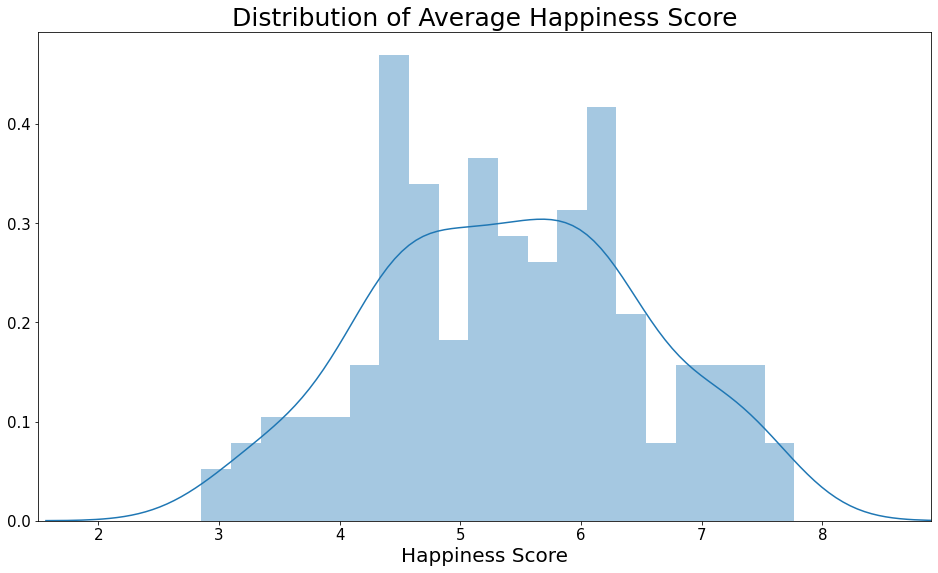

In [12]:
# Checking the distribution for Happiness Score
plt.figure(figsize = (16, 9))

sns.distplot(a = happiness_dataset['Score'], bins = 20, kde = True,)
plt.xlabel('Happiness Score', fontsize = 20)
plt.title('Distribution of Average Happiness Score', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((1.5, 8.9));

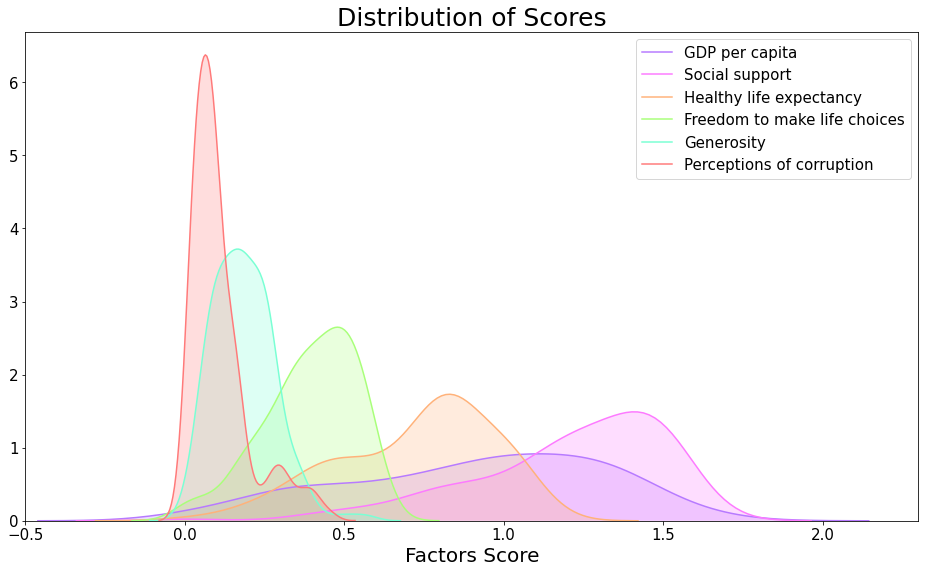

In [13]:
## Creating the grouped table
country_factors_avg = happiness_dataset.groupby(by = ['Country or region'])[['GDP per capita',
       'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].mean().reset_index()

plt.figure(figsize = (16, 9))

sns.kdeplot(data = happiness_dataset['GDP per capita'], color = "#B77AFF", shade = True)
sns.kdeplot(data = happiness_dataset['Social support'], color = "#FD7AFF", shade = True)
sns.kdeplot(data = happiness_dataset['Healthy life expectancy'], color = "#FFB27A", shade = True)
sns.kdeplot(data = happiness_dataset['Freedom to make life choices'], color = "#A9FF7A", shade = True)
sns.kdeplot(data = happiness_dataset['Generosity'], color = "#7AFFD4", shade = True)
sns.kdeplot(data = happiness_dataset['Perceptions of corruption'], color = "#FF7A7A", shade = True)

plt.xlabel('Factors Score', fontsize = 20)
plt.title('Distribution of Scores', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim((-0.5, 2.3))
plt.legend(fontsize = 15);

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Country or region'>

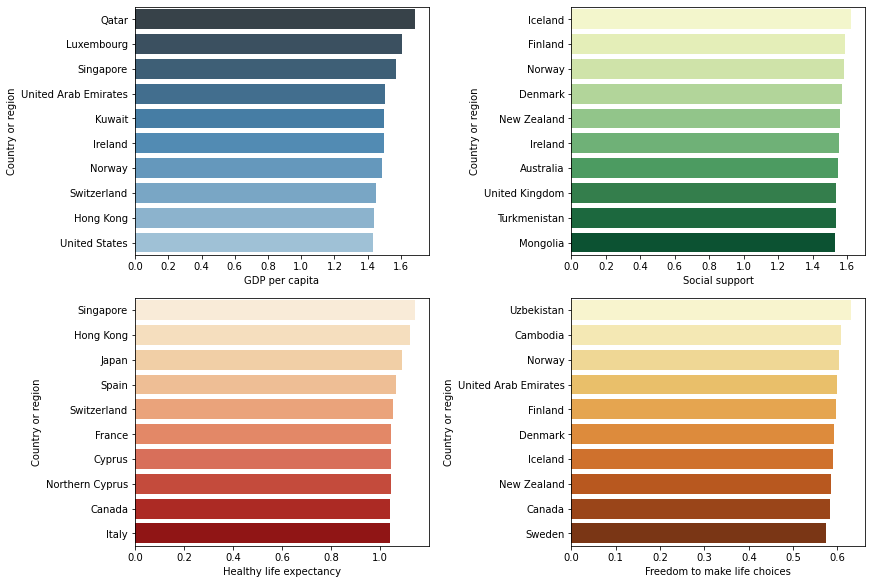

In [14]:
#Top 10 for each attribute
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=happiness_dataset.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=happiness_dataset.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=happiness_dataset.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=happiness_dataset.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Country or region'>

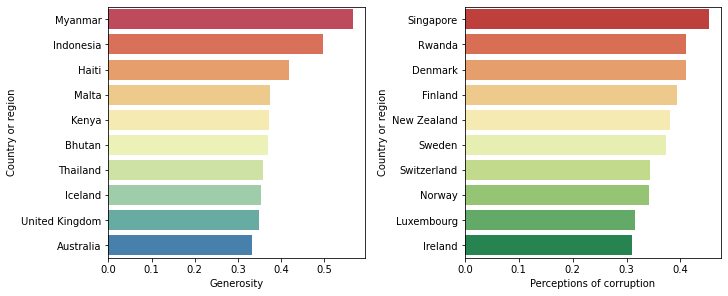

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=happiness_dataset.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=happiness_dataset.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

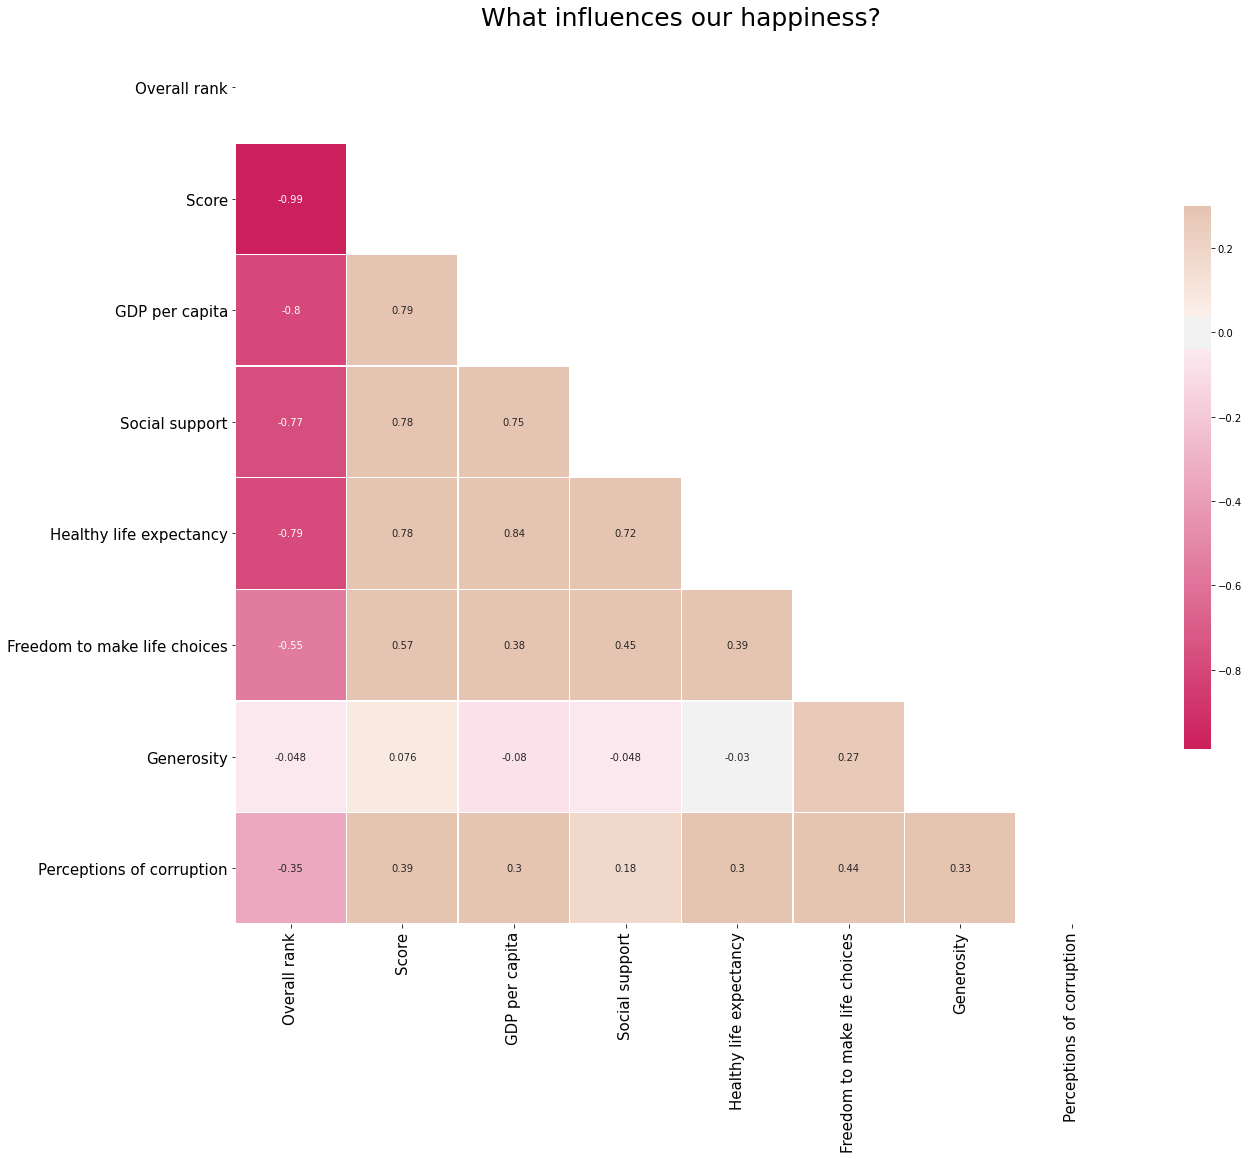

In [16]:
corrmat = happiness_dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrmat, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrmat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('What influences our happiness?', fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

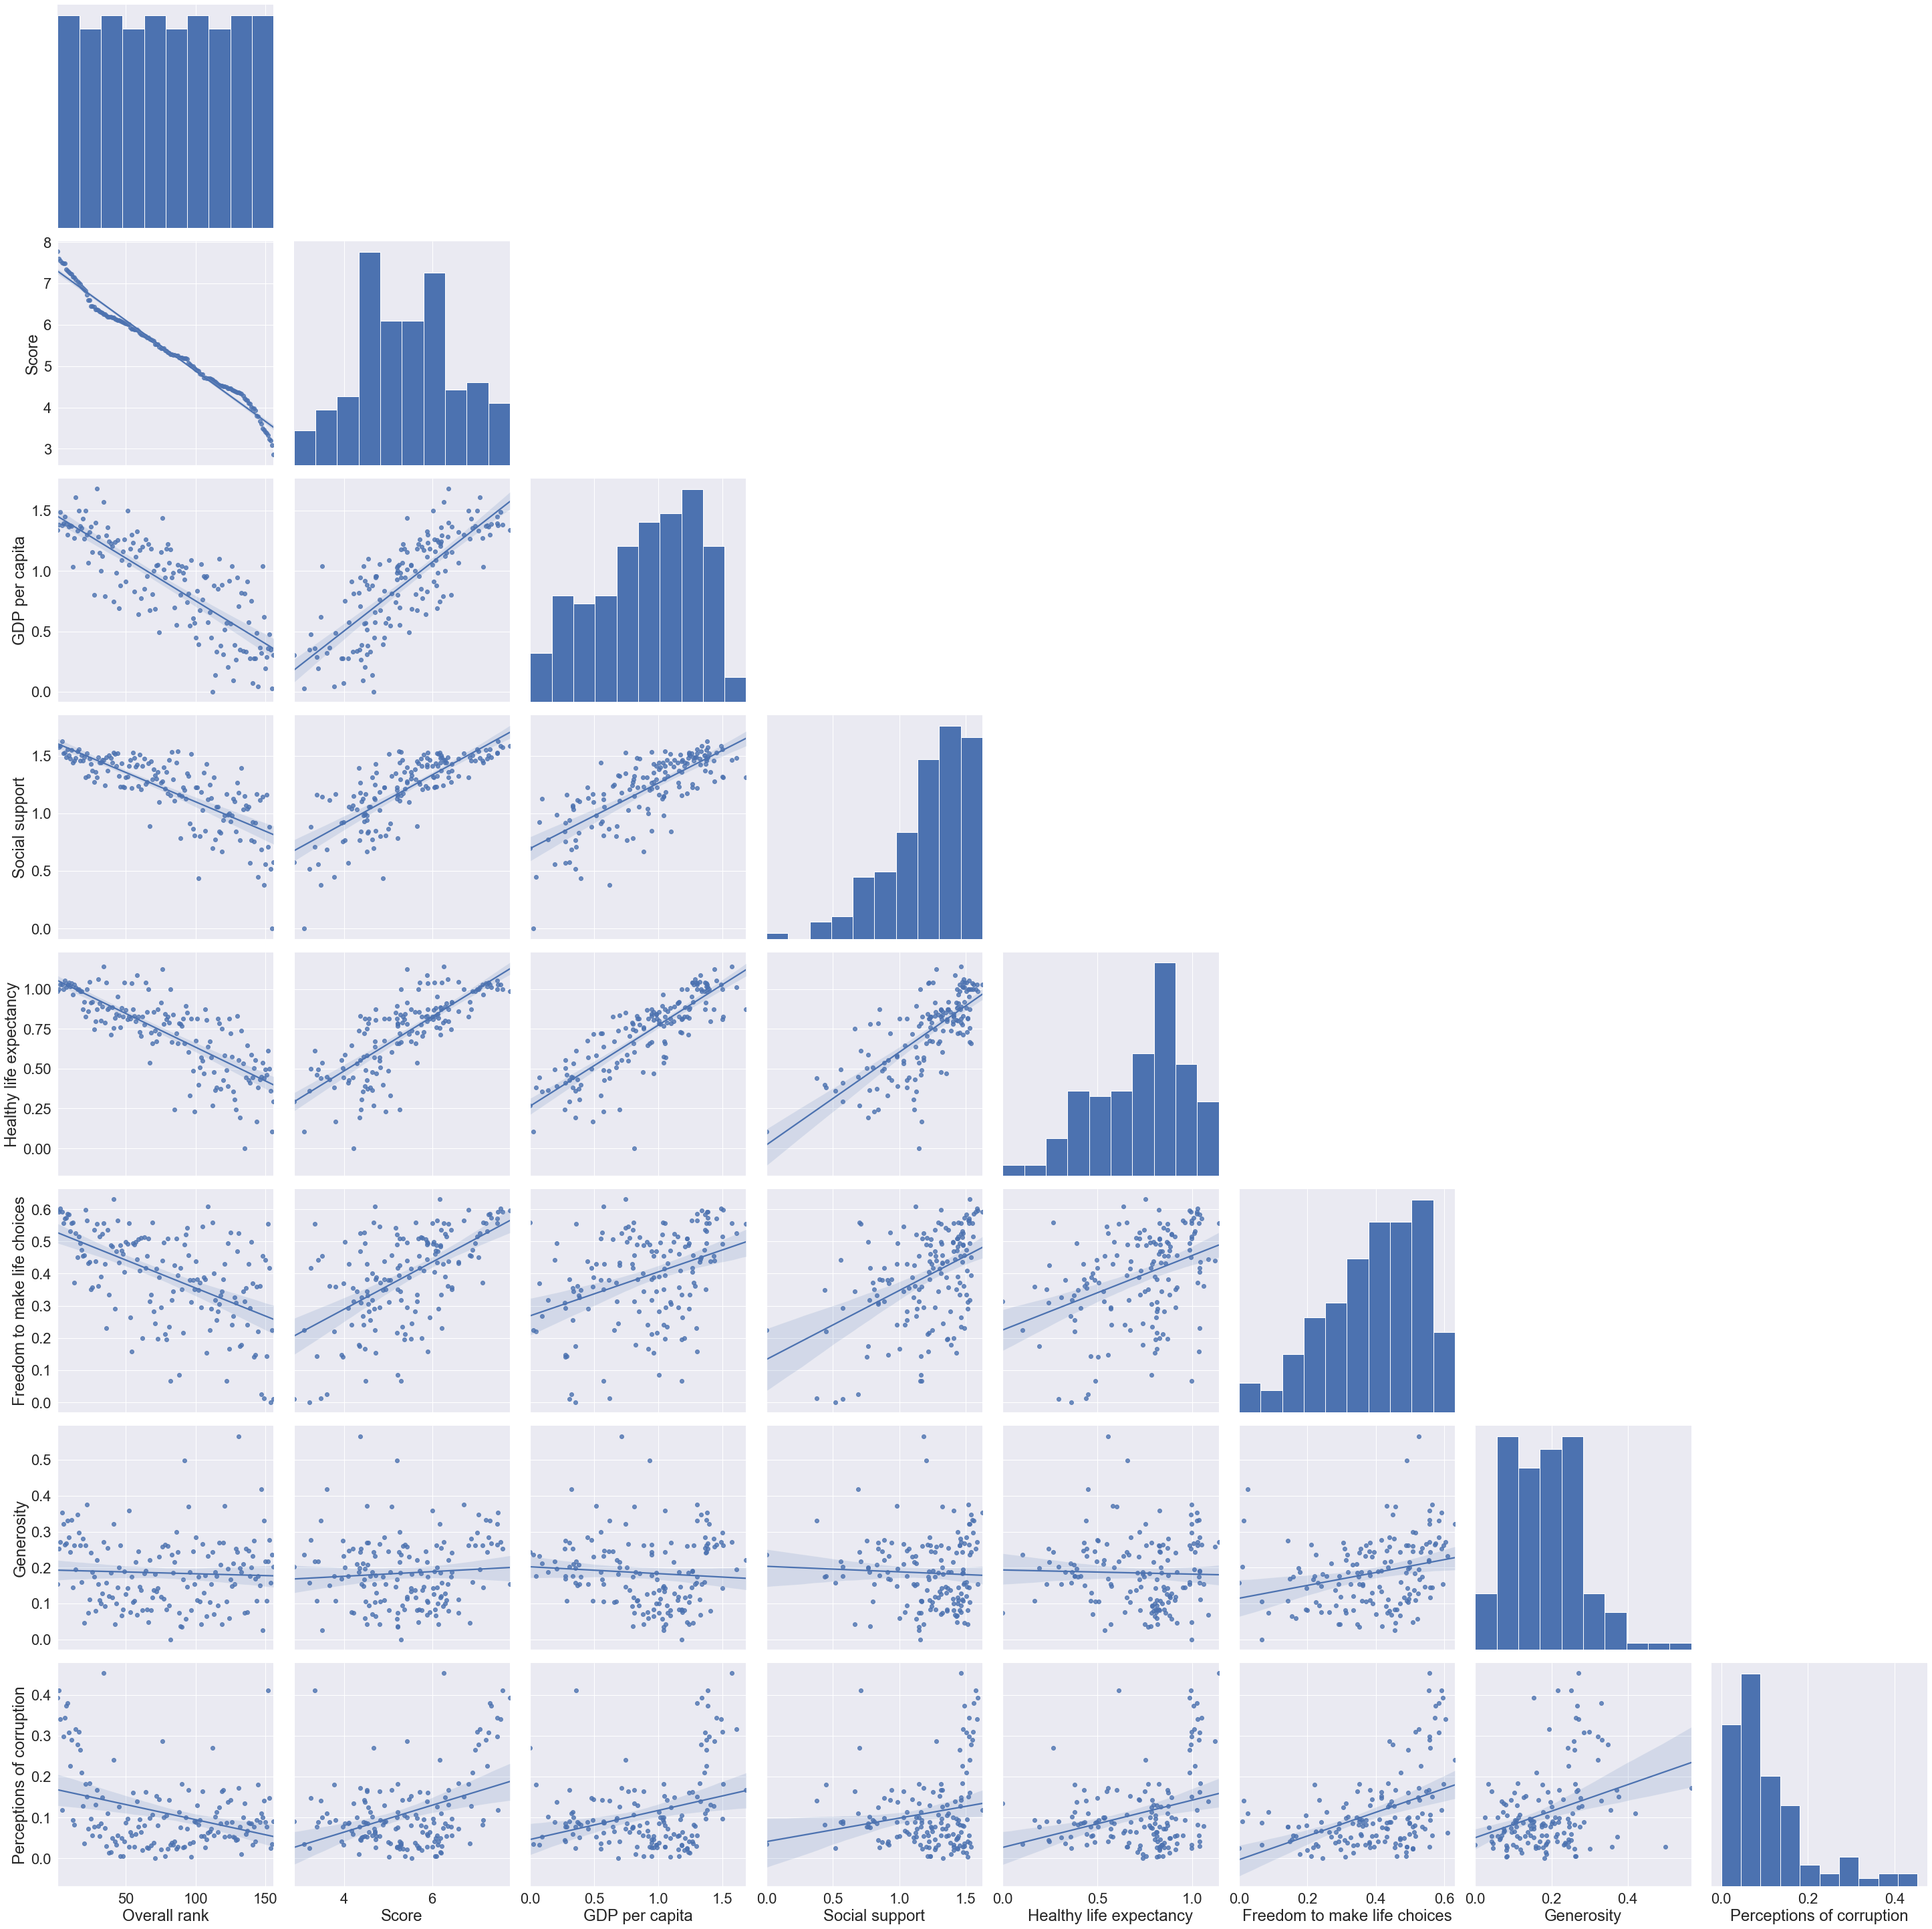

In [17]:
sns.set(font_scale = 2)
sns.pairplot(happiness_dataset,height=5,corner=True,kind="reg")

There's a positive correlation between social support with happiness score and life expectancy
Most of the country's citizen have low perceptions on corruption of government
There are no factors which correlates with generosity
GDP has high correlation with social support and life expectancy
Freedom has good correlation with happiness score and as well as GDP and life expectancy
Perceptions of corruption factor is right skewed and Social support factor is left skewed

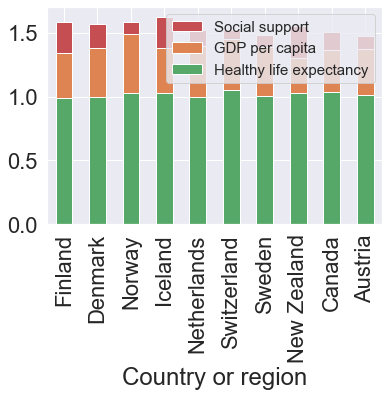

In [18]:
#Social support vs GDP per capita & Life expectancy
top_10 = happiness_dataset.sort_values(by='Score',ascending=False)[0:10]
ax = top_10.plot(y="Social support", x="Country or region", kind="bar",color='C3')
top_10.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
top_10.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")
plt.legend(fontsize = 15, loc='upper right')
plt.show()

Relationship between Freedom and Corruption.

"Corruption is an enormous obstacle to the realization of all human rights – civil, political, economic, social and cultural, as well as the right to development. Corruption violates the core human rights principles of transparency, accountability, non-discrimination and meaningful participation in every aspect of the life of the community"

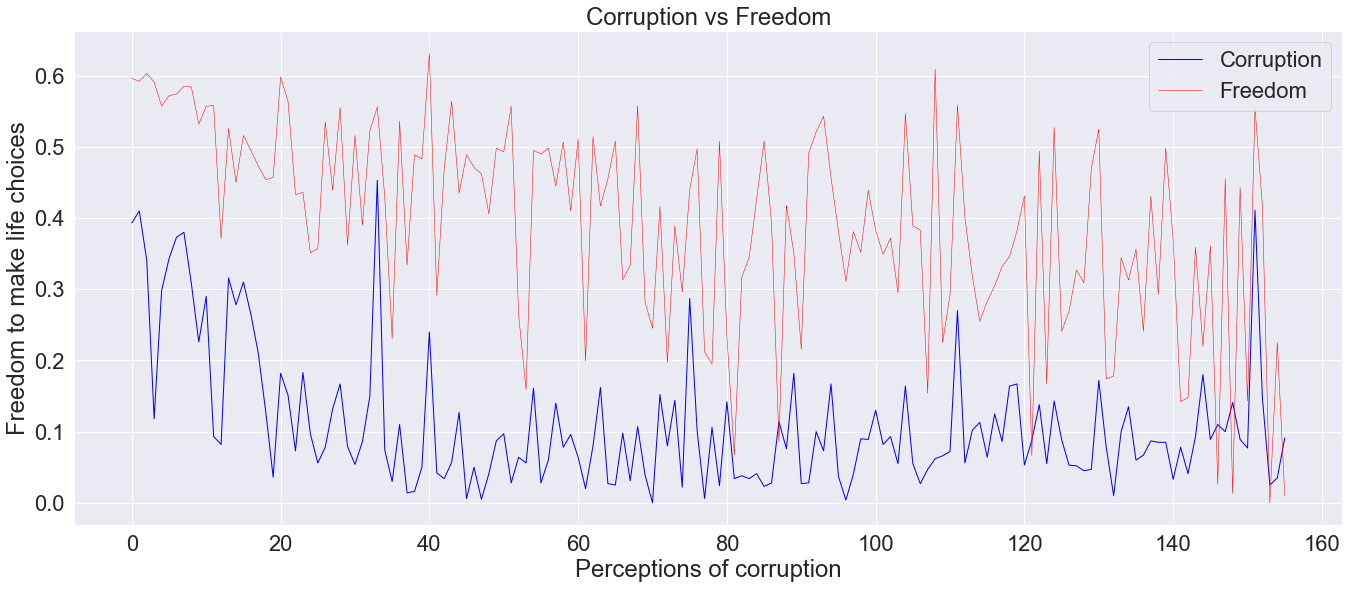

In [19]:
fig = plt.figure(figsize=(50,20))

plt.subplot(2, 2, 1)
happiness_dataset["Perceptions of corruption"].plot(kind='line', color='blue',label='Corruption',linewidth=1,grid=True,linestyle="-")
happiness_dataset["Freedom to make life choices"].plot(kind="line", color="red", label="Freedom", linewidth=0.5,grid=True,linestyle="-")
plt.xlabel('Perceptions of corruption')
plt.ylabel('Freedom to make life choices')
plt.title('Corruption vs Freedom')
plt.legend(loc='upper right')
plt.show()

# Linear regressions

GDP per capita vs Score

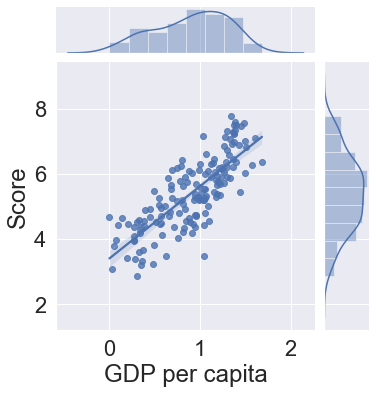

In [20]:
sns.jointplot(x="GDP per capita",y="Score",data=happiness_dataset,kind="reg")
plt.show()

Social Support vs Score

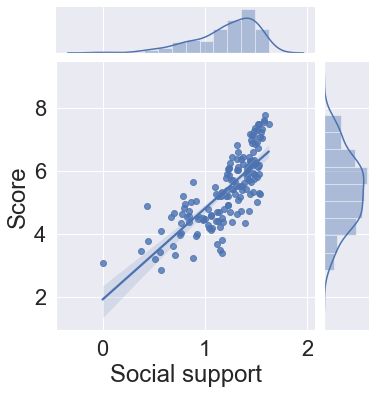

In [21]:
sns.jointplot(x="Social support",y="Score",data=happiness_dataset,kind="reg")
plt.show()

In [22]:
happiness_dataset.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Healthy life expectancy vs Score

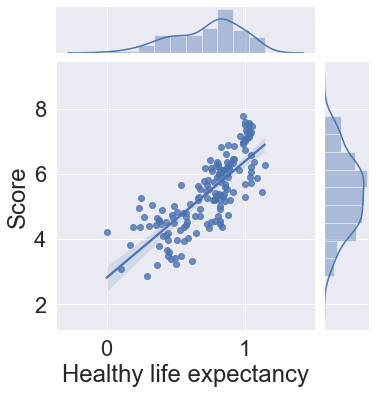

In [23]:
sns.jointplot(x="Healthy life expectancy",y="Score",data=happiness_dataset,kind="reg")
plt.show()

Freedom to make life choices vs Score

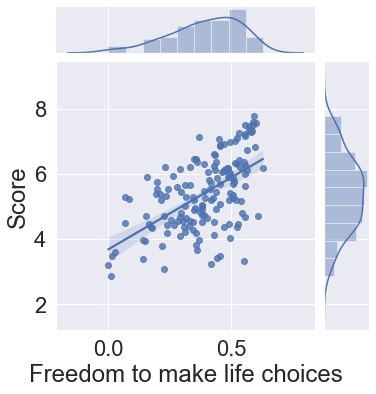

In [24]:
sns.jointplot(x="Freedom to make life choices",y="Score",data=happiness_dataset,kind="reg")
plt.show()

Generosity vs Score

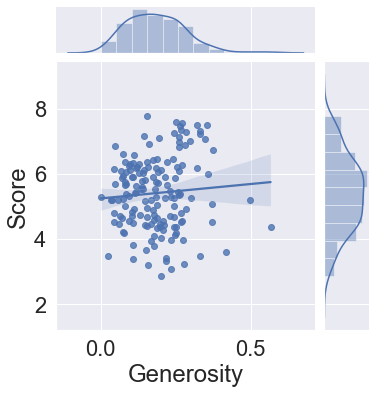

In [25]:
sns.jointplot(x="Generosity",y="Score",data=happiness_dataset,kind="reg")
plt.show()

Perceptions absence of corruption vs Score

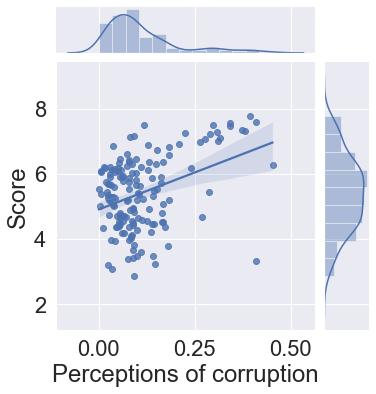

In [26]:
sns.jointplot(x="Perceptions of corruption",y="Score",data=happiness_dataset,kind="reg")
plt.show()

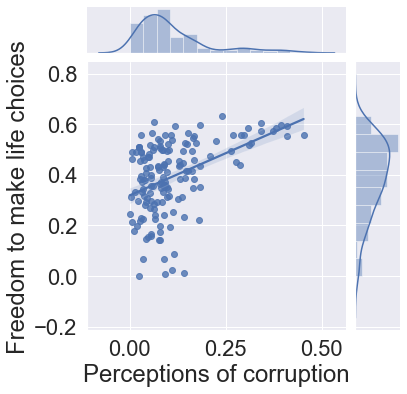

In [27]:
#Absence of corruption vs Freedom
sns.jointplot(x="Perceptions of corruption",y="Freedom to make life choices",data=happiness_dataset,kind="reg")
plt.show()

Regression model

In [28]:
reg_model=happiness_dataset.drop(['Overall rank','Country or region'],axis=1)
# Outcome and Explanatory variables
x = reg_model.drop(['Score'],axis=1)
y = reg_model['Score']

In [29]:
reg_model

Score  GDP per capita  Social support  Healthy life expectancy  \
0    7.769           1.340           1.587                    0.986   
1    7.600           1.383           1.573                    0.996   
2    7.554           1.488           1.582                    1.028   
3    7.494           1.380           1.624                    1.026   
4    7.488           1.396           1.522                    0.999   
..     ...             ...             ...                      ...   
151  3.334           0.359           0.711                    0.614   
152  3.231           0.476           0.885                    0.499   
153  3.203           0.350           0.517                    0.361   
154  3.083           0.026           0.000                    0.105   
155  2.853           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393  
1                           0.592       0.252                      0.410  
2                           0.603       0.271                      0.341  
3                           0.591       0.354                      0.118  
4                           0.557       0.322                      0.298  
..                            ...         ...                        ...  
151                         0.555       0.217                      0.411  
152                         0.417       0.276                      0.147  
153                         0.000       0.158                      0.025  
154                         0.225       0.235                      0.035  
155                         0.010       0.202                      0.091  

[156 rows x 7 columns]

In [30]:
import statsmodels.api as sm
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Mon, 12 Oct 2020   Prob (F-statistic):           2.40e-46
Time:                        19:53:25   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.7952      0.211      8.505      0.000       1.378       2.212
GDP per capita                   0.7754      0.218      3.553      0.001       0.344       1.207
Social support                   1.1242      0.237      4.745      0.000       0.656       1.592
Healthy life expectancy          1.0781      0.335      3.223      0.002       0.417       1.739
Freedom to make life choices     1.4548      0.375      3.876      0.000       0.713       2.197
Generosity                       0.4898      0.498      0.984      0.327      -0.494       1.473
Perceptions of corruption        0.9723      0.542      1.793      0.075      -0.099       2.044
==============================================================================
Omnibus:                        8.188   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                7.971
Skew:                          -0.498   Prob(JB):                       0.0186
Kurtosis:                       3.483   Cond. No.                         28.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What influences happiness ?

In [31]:
# Calculating the Pearson Correlation

c1 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['GDP per capita'])
c2 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['Social support'])
c3 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['Healthy life expectancy'])
c4 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['Freedom to make life choices'])
c5 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['Generosity'])
c6 = scipy.stats.pearsonr(happiness_dataset['Score'], happiness_dataset['Perceptions of corruption'])

print('Happiness Score + GDP: pearson = ', round(c1[0],2), '   pvalue = ', round(c1[1],4))
print('Happiness Score + Family: pearson = ', round(c2[0],2), '   pvalue = ', round(c2[1],4))
print('Happiness Score + Health: pearson = ', round(c3[0],2), '   pvalue = ', round(c3[1],4))
print('Happiness Score + Freedom: pearson = ', round(c4[0],2), '   pvalue = ', round(c4[1],4))
print('Happiness Score + Generosity: pearson = ', round(c5[0],2), '   pvalue = ', round(c5[1],4))
print('Happiness Score + Trust: pearson = ', round(c6[0],2), '   pvalue = ', round(c6[1],4))

Happiness Score + GDP: pearson =  0.79    pvalue =  0.0
Happiness Score + Family: pearson =  0.78    pvalue =  0.0
Happiness Score + Health: pearson =  0.78    pvalue =  0.0
Happiness Score + Freedom: pearson =  0.57    pvalue =  0.0
Happiness Score + Generosity: pearson =  0.08    pvalue =  0.3468
Happiness Score + Trust: pearson =  0.39    pvalue =  0.0


Pearson correlation: Values always range between -1 (strong negative relationship) and +1 (strong positive relationship). Values at or close to zero imply weak or no linear relationship.

In [32]:
import sklearn

explained variance ratio (first two components): [0.78162362 0.08482238]


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

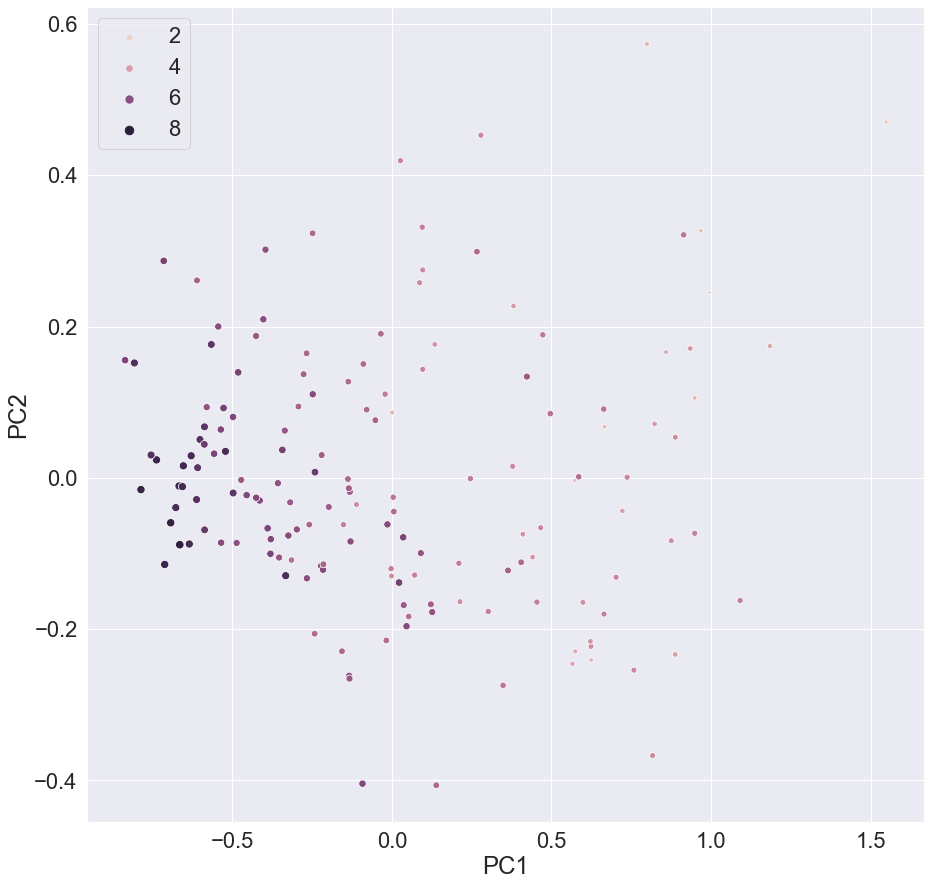

In [33]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = datasets.load_iris()
X = reg_model.drop('Score',axis=1)
y = reg_model['Score']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

X_r = np.concatenate([X_r, y.values.reshape(1,-1).T], axis=1)
X_r = pd.DataFrame(X_r)
X_r.columns=['PC1','PC2','Score']
fig, ax=plt.subplots(figsize=(15,15))
sns.scatterplot(x='PC1', y='PC2', data=X_r, hue=X_r['Score'].tolist(),size=X_r['Score'].tolist())


Distribution des pays et de leur scores
Analyse en composante principale

PCA à partir des variables explicatives
lien entre le score et la position  -> il y a un gradient géométrique

In [34]:
X_r
#y.shape

PC1       PC2  Score
0   -0.664654 -0.088389  7.769
1   -0.693111 -0.059400  7.600
2   -0.786312 -0.015575  7.554
3   -0.711836 -0.114536  7.494
4   -0.666854 -0.010833  7.488
..        ...       ...    ...
151  0.666427  0.067655  3.334
152  0.572430 -0.003801  3.231
153  0.968246  0.326700  3.203
154  1.548601  0.470359  3.083
155  0.994621  0.244808  2.853

[156 rows x 3 columns]

In [35]:
y.values.reshape(1,-1).T.shape

(156, 1)

In [36]:
reg_model.drop('Score',axis=1)

GDP per capita  Social support  Healthy life expectancy  \
0             1.340           1.587                    0.986   
1             1.383           1.573                    0.996   
2             1.488           1.582                    1.028   
3             1.380           1.624                    1.026   
4             1.396           1.522                    0.999   
..              ...             ...                      ...   
151           0.359           0.711                    0.614   
152           0.476           0.885                    0.499   
153           0.350           0.517                    0.361   
154           0.026           0.000                    0.105   
155           0.306           0.575                    0.295   

     Freedom to make life choices  Generosity  Perceptions of corruption  
0                           0.596       0.153                      0.393  
1                           0.592       0.252                      0.410  
2                           0.603       0.271                      0.341  
3                           0.591       0.354                      0.118  
4                           0.557       0.322                      0.298  
..                            ...         ...                        ...  
151                         0.555       0.217                      0.411  
152                         0.417       0.276                      0.147  
153                         0.000       0.158                      0.025  
154                         0.225       0.235                      0.035  
155                         0.010       0.202                      0.091  

[156 rows x 6 columns]